In [1]:
#Dec 28 Prediction- 14 day window , 7 day prediction
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# X_train = pd.read_csv("weekly_agg_county/x_train_county_aggregated_weekly.csv",index_col=0)
# y_train = pd.read_csv("weekly_agg_county/y_train_county_aggregated_weekly.csv",index_col=0)
# X_test = pd.read_csv("weekly_agg_county/x_test_county_aggregated_weekly.csv",index_col=0)
# y_test = pd.read_csv("weekly_agg_county/y_test_county_aggregated_weekly.csv",index_col=0)

# X_train = pd.read_csv("/data/BHI_G5/weekly_agg_county/Omicron_Pred/scaled_x_train.csv",index_col=0)
# y_train = pd.read_csv("/data/BHI_G5/weekly_agg_county/Omicron_Pred/scaled_y_train.csv",index_col=0)
# X_test = pd.read_csv("/data/BHI_G5/weekly_agg_county/Omicron_Pred/scaled_x_test.csv",index_col=0)
# y_test = pd.read_csv("/data/BHI_G5/weekly_agg_county/Omicron_Pred/scaled_y_test.csv",index_col=0)

X_train = pd.read_csv("/data/BHI_G5/daily_agg_county/Delta_Omicron_Pred/14DayWin_7DayPred/x_train.csv",index_col=0)
y_train = pd.read_csv("/data/BHI_G5/daily_agg_county/Delta_Omicron_Pred/14DayWin_7DayPred/y_train.csv",index_col=0)
X_val = pd.read_csv("/data/BHI_G5/daily_agg_county/Delta_Omicron_Pred/14DayWin_7DayPred/x_val.csv",index_col=0)
y_val = pd.read_csv("/data/BHI_G5/daily_agg_county/Delta_Omicron_Pred/14DayWin_7DayPred/y_val.csv",index_col=0)


X_test = pd.read_csv("/data/BHI_G5/daily_agg_county/Delta_Omicron_Pred/14DayWin_7DayPred/x_test.csv",index_col=0)
y_test = pd.read_csv("/data/BHI_G5/daily_agg_county/Delta_Omicron_Pred/14DayWin_7DayPred/y_test.csv",index_col=0)

In [184]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [185]:
pip install skforecast

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput

#xg_reg = ForecasterAutoregMultiOutput(xgb.XGBRegressor((objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.07, max_depth = 6, min_child_weight = 4, alpha = 10, n_estimators = 500, nthread = 4, silent = 1, subsample = 0.7)), steps = 36, lag = 8)
#xg_reg = MultiOutputRegressor(xgb.XGBRegressor(objective ='reg:linear', num_round = 100, colsample_bytree = 0.3, learning_rate = 0.5, max_depth = 5, alpha = 10, n_estimators = 500))
#xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg = MultiOutputRegressor(xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.07, max_depth = 6, min_child_weight = 4, alpha = 0, n_estimators = 500, nthread = 4, silent = 1, subsample = 0.7))

In [3]:
y_trainfirst = y_train.iloc[:,0]
y_valfirst = y_val.iloc[:,0]

In [188]:
#y_train

In [4]:
#y_train = pd.Series(y_train)
xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_val)

[21:14:34] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:14:34] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_val, preds))
print("RMSE: %f" % (rmse))

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_val, preds)
print("MAE: %f" % (mae))

mse = mean_squared_error(y_val, preds)
print("MSE: %f" % (mse))

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_val, preds)
print("MAPE: %f" % (mape))

In [191]:
# def mean_absolute_percentage_error(y_val, preds): 
#     y_true, y_pred = np.array(y_val), np.array(preds)
#     return np.mean(np.abs((y_val - preds) / y_val)) * 100

# mean_absolute_percentage_error

In [ ]:
mappp = np.mean(np.abs((y_val - preds) / y_val)) * 100
mappp

In [193]:
preds

array([[ 0.5636496 , -0.620229  ,  0.5647817 , ..., -0.6313132 ,
         0.574794  , -0.61850715],
       [ 0.56261474, -0.6313582 ,  0.56426924, ..., -0.61317617,
         0.57406193, -0.59669286],
       [ 0.56201637, -0.6306518 ,  0.5640792 , ..., -0.58364034,
         0.57399917, -0.57752746],
       ...,
       [ 0.5589003 , -0.4849344 ,  0.5572892 , ..., -0.48303849,
         0.56336814, -0.5271881 ],
       [ 0.5577359 , -0.43762553,  0.55782473, ..., -0.47350872,
         0.56219727, -0.5305417 ],
       [ 0.5557999 , -0.37982264,  0.5571906 , ..., -0.42473546,
         0.56032735, -0.47322115]], dtype=float32)

In [194]:
#rolmean = df['metrics.caseDensity'].rolling(7).mean()

In [195]:
preds.shape

(94, 14)

In [196]:
y_test

,metrics.deathDensity(t),metrics.caseDensity(t),metrics.deathDensity(t+1),metrics.caseDensity(t+1),metrics.deathDensity(t+2),metrics.caseDensity(t+2),metrics.deathDensity(t+3),metrics.caseDensity(t+3),metrics.deathDensity(t+4),metrics.caseDensity(t+4),metrics.deathDensity(t+5),metrics.caseDensity(t+5),metrics.deathDensity(t+6),metrics.caseDensity(t+6)
date,,,,,,,,,,,,,,
2021-07-29,0.704836,-0.289115,0.706336,-0.230692,0.706897,-0.194339,0.707150,-0.149717,0.709063,-0.109956,0.712073,-0.050929,0.714979,0.015805
2021-07-30,0.706336,-0.230692,0.706897,-0.194339,0.707150,-0.149717,0.709063,-0.109956,0.712073,-0.050929,0.714979,0.015805,0.716998,0.087378
2021-07-31,0.706897,-0.194339,0.707150,-0.149717,0.709063,-0.109956,0.712073,-0.050929,0.714979,0.015805,0.716998,0.087378,0.719369,0.155552
2021-08-01,0.707150,-0.149717,0.709063,-0.109956,0.712073,-0.050929,0.714979,0.015805,0.716998,0.087378,0.719369,0.155552,0.719933,0.220510
2021-08-02,0.709063,-0.109956,0.712073,-0.050929,0.714979,0.015805,0.716998,0.087378,0.719369,0.155552,0.719933,0.220510,0.720253,0.270596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,1.704336,1.598608,1.708077,1.977789,1.708664,2.326160,1.708995,2.672002,1.717694,3.000612,1.727410,3.385488,1.737343,3.775976
2021-12-31,1.708077,1.977789,1.708664,2.326160,1.708995,2.672002,1.717694,3.000612,1.727410,3.385488,1.737343,3.775976,1.745241,4.143171
2022-01-01,1.708664,2.326160,1.708995,2.672002,1.717694,3.000612,1.727410,3.385488,1.737343,3.775976,1.745241,4.143171,1.752862,4.583388


In [197]:
X_test

,actuals.cases(t-14),actuals.deaths(t-14),metrics.deathDensity(t-14),metrics.caseDensity(t-14),metrics.vaccinationsCompletedRatio(t-14),metrics.vaccinationsInitiatedRatio(t-14),cdcTransmissionLevel(t-14),riskLevels.caseDensity(t-14),riskLevels.overall(t-14),actuals.cases(t-13),...,riskLevels.overall(t-2),actuals.cases(t-1),actuals.deaths(t-1),metrics.deathDensity(t-1),metrics.caseDensity(t-1),metrics.vaccinationsCompletedRatio(t-1),metrics.vaccinationsInitiatedRatio(t-1),cdcTransmissionLevel(t-1),riskLevels.caseDensity(t-1),riskLevels.overall(t-1)
date,,,,,,,,,,,,,,,,,,,,,
2021-07-29,0.602350,0.729061,0.689774,-0.858122,0.980125,0.905109,-0.951312,-0.928586,-0.721774,0.607202,...,-0.021660,0.644438,0.741781,0.703664,-0.355442,1.016009,0.958546,0.125869,-0.216856,0.042171
2021-07-30,0.607202,0.730263,0.691312,-0.840720,0.985162,0.907654,-0.861040,-0.886208,-0.663078,0.607939,...,0.042171,0.649147,0.743149,0.704836,-0.289115,1.019459,0.966006,0.211852,-0.133201,0.099115
2021-07-31,0.607939,0.730587,0.691514,-0.817216,0.987472,0.910633,-0.788276,-0.854530,-0.613452,0.608486,...,0.099115,0.660757,0.745159,0.706336,-0.230692,1.022487,0.972213,0.292954,-0.057225,0.163654
2021-08-01,0.608486,0.730698,0.691574,-0.798234,0.989478,0.913286,-0.729206,-0.818533,-0.558230,0.611897,...,0.163654,0.662512,0.745710,0.706897,-0.194339,1.025576,0.977878,0.351070,-0.004203,0.200766
2021-08-02,0.611897,0.731697,0.692691,-0.779237,0.991852,0.916274,-0.657990,-0.787872,-0.503039,0.614146,...,0.200766,0.663895,0.745959,0.707150,-0.149717,1.027583,0.982165,0.391085,0.049835,0.233112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,1.588492,1.531432,1.611433,0.507352,1.575462,1.579818,0.751574,0.657611,0.697087,1.599765,...,1.096617,1.771768,1.609863,1.699041,1.193656,1.601060,1.612434,1.141598,1.204798,1.268894
2021-12-31,1.599765,1.539750,1.620292,0.484910,1.578702,1.583385,0.776107,0.643861,0.679715,1.604261,...,1.268894,1.801830,1.615218,1.704336,1.598608,1.603130,1.614962,1.165059,1.449382,1.512873
2022-01-01,1.604261,1.541744,1.621761,0.495472,1.581064,1.586561,0.822195,0.673393,0.696227,1.608304,...,1.512873,1.842416,1.620063,1.708077,1.977789,1.605485,1.618446,1.181850,1.650939,1.701784


In [ ]:
# y_pred.shape
col = y_test.columns

In [ ]:
y_pred = xg_reg.predict(X_test)
y_pred_df=pd.DataFrame()
y_pred_df[col] = y_pred
y_pred_df.index = y_test.index
y_pred_df

In [200]:
y_pred_df.head(7)

,metrics.deathDensity(t),metrics.caseDensity(t),metrics.deathDensity(t+1),metrics.caseDensity(t+1),metrics.deathDensity(t+2),metrics.caseDensity(t+2),metrics.deathDensity(t+3),metrics.caseDensity(t+3),metrics.deathDensity(t+4),metrics.caseDensity(t+4),metrics.deathDensity(t+5),metrics.caseDensity(t+5),metrics.deathDensity(t+6),metrics.caseDensity(t+6)
date,,,,,,,,,,,,,,
2021-07-29,0.555593,-0.345878,0.557833,-0.337487,0.557461,-0.353129,0.559090,-0.310690,0.557982,-0.337984,0.564417,-0.358330,0.560507,-0.412339
2021-07-30,0.554766,-0.291447,0.558550,-0.275773,0.558287,-0.291447,0.560289,-0.307209,0.557169,-0.329561,0.564909,-0.336115,0.560287,-0.413387
2021-07-31,0.554106,-0.247855,0.556654,-0.253995,0.558513,-0.270725,0.557494,-0.285107,0.553420,-0.302899,0.561426,-0.329542,0.558683,-0.388252
2021-08-01,0.551039,-0.231830,0.554681,-0.251446,0.554067,-0.267319,0.555034,-0.285914,0.552455,-0.315019,0.556427,-0.330339,0.556229,-0.384900
2021-08-02,0.551380,-0.162892,0.553770,-0.222606,0.553645,-0.237415,0.554206,-0.274750,0.552690,-0.308190,0.557115,-0.336280,0.558299,-0.378973
2021-08-03,0.550042,-0.139918,0.552236,-0.181813,0.553635,-0.216220,0.554376,-0.253511,0.554390,-0.293144,0.558336,-0.339936,0.560262,-0.373173
2021-08-04,0.550453,-0.108824,0.552254,-0.137300,0.552945,-0.163871,0.553854,-0.171955,0.554648,-0.257858,0.558104,-0.272071,0.560264,-0.314672


In [9]:
new_y_pred_df=y_pred_df.iloc[::7, :]
new_y_pred_df

,metrics.deathDensity(t),metrics.caseDensity(t),metrics.deathDensity(t+1),metrics.caseDensity(t+1),metrics.deathDensity(t+2),metrics.caseDensity(t+2),metrics.deathDensity(t+3),metrics.caseDensity(t+3),metrics.deathDensity(t+4),metrics.caseDensity(t+4),metrics.deathDensity(t+5),metrics.caseDensity(t+5),metrics.deathDensity(t+6),metrics.caseDensity(t+6)
date,,,,,,,,,,,,,,
2021-07-29,0.553070,0.215413,0.547161,0.333031,0.550564,0.426305,0.558096,0.576223,0.553778,0.597438,0.547989,0.569139,0.557187,0.472635
2021-08-05,0.551270,0.894244,0.548911,0.948595,0.541377,0.950264,0.551651,0.976692,0.553541,0.959912,0.549787,0.807916,0.562058,0.784091
2021-08-12,0.550830,1.070146,0.540479,1.185364,0.539401,1.201447,0.548600,1.138106,0.554042,1.268715,0.549750,1.195831,0.559756,0.983428
2021-08-19,0.550629,1.102712,0.540085,1.263777,0.537888,1.295486,0.549476,1.251878,0.553334,1.328330,0.550027,1.250243,0.559641,0.987253
2021-08-26,0.534491,1.225030,0.525385,1.311924,0.534617,1.342702,0.545005,1.295011,0.552180,1.336838,0.550008,1.264860,0.556100,1.002757
2021-09-02,0.529055,1.526235,0.510027,1.594584,0.530577,1.580064,0.536500,1.476089,0.550552,1.440416,0.540759,1.328025,0.544786,1.023293
2021-09-09,0.520322,1.430560,0.499805,1.480287,0.523203,1.475017,0.528107,1.405349,0.549231,1.301760,0.539831,1.168695,0.540558,0.915898
2021-09-16,0.522155,1.463628,0.503997,1.468711,0.522997,1.479610,0.529723,1.366545,0.549899,1.337039,0.538468,1.197982,0.539171,0.959512
2021-09-23,0.521709,1.174047,0.499308,1.094502,0.523710,1.056341,0.527738,1.036147,0.551058,0.994160,0.538502,0.798011,0.540076,0.789315


In [10]:
#Case Density DataFrame
cases_y_pred_df = new_y_pred_df
cases_y_pred_df = cases_y_pred_df.drop(['metrics.deathDensity(t)', 'metrics.deathDensity(t+1)', 'metrics.deathDensity(t+2)', 'metrics.deathDensity(t+3)', 'metrics.deathDensity(t+4)', 'metrics.deathDensity(t+5)', 'metrics.deathDensity(t+6)'], axis = 1)
cases_y_pred_df

,metrics.caseDensity(t),metrics.caseDensity(t+1),metrics.caseDensity(t+2),metrics.caseDensity(t+3),metrics.caseDensity(t+4),metrics.caseDensity(t+5),metrics.caseDensity(t+6)
date,,,,,,,
2021-07-29,0.215413,0.333031,0.426305,0.576223,0.597438,0.569139,0.472635
2021-08-05,0.894244,0.948595,0.950264,0.976692,0.959912,0.807916,0.784091
2021-08-12,1.070146,1.185364,1.201447,1.138106,1.268715,1.195831,0.983428
2021-08-19,1.102712,1.263777,1.295486,1.251878,1.328330,1.250243,0.987253
2021-08-26,1.225030,1.311924,1.342702,1.295011,1.336838,1.264860,1.002757
2021-09-02,1.526235,1.594584,1.580064,1.476089,1.440416,1.328025,1.023293
2021-09-09,1.430560,1.480287,1.475017,1.405349,1.301760,1.168695,0.915898
2021-09-16,1.463628,1.468711,1.479610,1.366545,1.337039,1.197982,0.959512
2021-09-23,1.174047,1.094502,1.056341,1.036147,0.994160,0.798011,0.789315


In [281]:
# death_y_pred_df = new_y_pred_df
# death_y_pred_df = death_y_pred_df.drop(['metrics.caseDensity(t)', 'metrics.caseDensity(t+1)', 'metrics.caseDensity(t+2)', 'metrics.caseDensity(t+3)', 'metrics.caseDensity(t+4)', 'metrics.caseDensity(t+5)', 'metrics.caseDensity(t+6)'], axis=1)
# death_y_pred_df

In [13]:
#case density
df_new1 = pd.DataFrame({'date': pd.date_range('2021-07-29','2022-01-05')})

transposecase_y_pred_df = cases_y_pred_df.T
ransposecase_y_pred_df = transposecase_y_pred_df.stack().reset_index()
#dff=y_pred_df
dff1= ransposecase_y_pred_df.iloc[:,2]
dff1

dfff1=pd.DataFrame(dff1)
#dfff1.drop(dfff1.tail(2).index, inplace = True)
# new_y_pred_df = transposedeath_y_pred_df.stack()
# df_new = pd.concat([df_new, new_y_pred_df])
df_new1['date'] = pd.to_datetime(df_new1['date'])

df_new1.set_index('date')
new_df1 = pd.concat([df_new1, dfff1], axis=1)
new_df1.set_index('date')

,0
date,
2021-07-29,0.215413
2021-07-30,0.894244
2021-07-31,1.070146
2021-08-01,1.102712
2021-08-02,1.225030
...,...
2022-01-01,0.548074
2022-01-02,0.359909
2022-01-03,0.207587


In [280]:
#death density not needed 
# transposedeath_y_pred_df = death_y_pred_df.T
# ransposedeath_y_pred_df = transposedeath_y_pred_df.stack().reset_index()
# #dff=y_pred_df
# dff= ransposedeath_y_pred_df.iloc[:,2]


# dfff=pd.DataFrame(dff)
# dfff.drop(dfff.tail(2).index, inplace = True)


# y_pred_df_date = y_pred_df.iloc[:,0]
# y_pred_df_date

# #new_df = pd.concat([y_pred_df_date, dfff], axis=1)
# #new_df
# #deathpred=y_pred_df
# #deathpred['predicted']= dfff
# #deathpred.predicted = deathpred.predicted.astype(float)
#deathpred
#deathpred = [y_pred_df, dfff]
#deathpred

In [15]:
death_y_pred_df = new_y_pred_df
death_y_pred_df = death_y_pred_df.drop(['metrics.caseDensity(t)', 'metrics.caseDensity(t+1)', 'metrics.caseDensity(t+2)', 'metrics.caseDensity(t+3)', 'metrics.caseDensity(t+4)', 'metrics.caseDensity(t+5)', 'metrics.caseDensity(t+6)'], axis=1)
death_y_pred_df

,metrics.deathDensity(t),metrics.deathDensity(t+1),metrics.deathDensity(t+2),metrics.deathDensity(t+3),metrics.deathDensity(t+4),metrics.deathDensity(t+5),metrics.deathDensity(t+6)
date,,,,,,,
2021-07-29,0.553070,0.547161,0.550564,0.558096,0.553778,0.547989,0.557187
2021-08-05,0.551270,0.548911,0.541377,0.551651,0.553541,0.549787,0.562058
2021-08-12,0.550830,0.540479,0.539401,0.548600,0.554042,0.549750,0.559756
2021-08-19,0.550629,0.540085,0.537888,0.549476,0.553334,0.550027,0.559641
2021-08-26,0.534491,0.525385,0.534617,0.545005,0.552180,0.550008,0.556100
2021-09-02,0.529055,0.510027,0.530577,0.536500,0.550552,0.540759,0.544786
2021-09-09,0.520322,0.499805,0.523203,0.528107,0.549231,0.539831,0.540558
2021-09-16,0.522155,0.503997,0.522997,0.529723,0.549899,0.538468,0.539171
2021-09-23,0.521709,0.499308,0.523710,0.527738,0.551058,0.538502,0.540076


In [16]:
#Death Density
df_new = pd.DataFrame({'date': pd.date_range('2021-07-29','2022-01-05')})

transposedeath_y_pred_df = death_y_pred_df.T
ransposedeath_y_pred_df = transposedeath_y_pred_df.stack().reset_index()
#dff=y_pred_df
dff= ransposedeath_y_pred_df.iloc[:,2]


dfff=pd.DataFrame(dff)
#dfff.drop(dfff.tail(2).index, inplace = True)
# new_y_pred_df = transposedeath_y_pred_df.stack()
# df_new = pd.concat([df_new, new_y_pred_df])
df_new['date'] = pd.to_datetime(df_new['date'])

df_new.set_index('date')
new_df = pd.concat([df_new, dfff], axis=1)
new_df.set_index('date')

,0
date,
2021-07-29,0.553070
2021-07-30,0.551270
2021-07-31,0.550830
2021-08-01,0.550629
2021-08-02,0.534491
...,...
2022-01-01,0.557396
2022-01-02,0.557804
2022-01-03,0.557789


matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


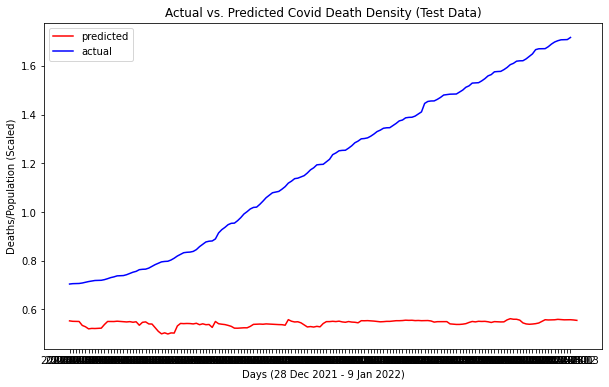

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(new_df[0], color='red')
plt.plot(y_test['metrics.deathDensity(t)'], color='blue')
plt.title('Actual vs. Predicted Covid Death Density (Test Data)')
plt.ylabel('Deaths/Population (Scaled)')
plt.xlabel('Days (28 Dec 2021 - 9 Jan 2022)')
plt.legend(['predicted', 'actual'])


In [279]:
# for col in y_pred_df.columns:    
#     print(col)

In [278]:
# import pandas as pd
# #y_pred_df[:,1] = pd.DatetimeIndex(y_pred_df['date'].values)
# new_y_pred_df = y_pred_df.groupby(pd.Grouper(key='metrics.deathDensity(t)', axis=0, freq='7D', sort=True)).mean()
# new_y_pred_df

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


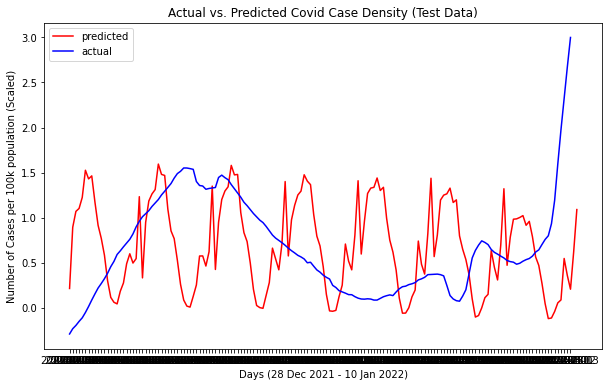

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(new_df1[0], color='red')
plt.plot(y_test['metrics.caseDensity(t)'], color='blue')
plt.title('Actual vs. Predicted Covid Case Density (Test Data)')
plt.ylabel('Number of Cases per 100k population (Scaled)')
plt.xlabel('Days (28 Dec 2021 - 10 Jan 2022)')
plt.legend(['predicted', 'actual'])

In [284]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,6))
# plt.plot(y_pred_df['metrics.deathDensity(t)'], color='red')
# plt.plot(y_test['metrics.deathDensity(t)'], color='blue')
# plt.title('Actual vs. Predicted Covid Death Density (Test Data)')
# plt.ylabel('Deaths/Population (Scaled)')
# plt.xlabel('Days (5 Aug 2021 - 9 Jan 2022)')
# plt.legend(['predicted', 'actual'])

<AxesSubplot:>

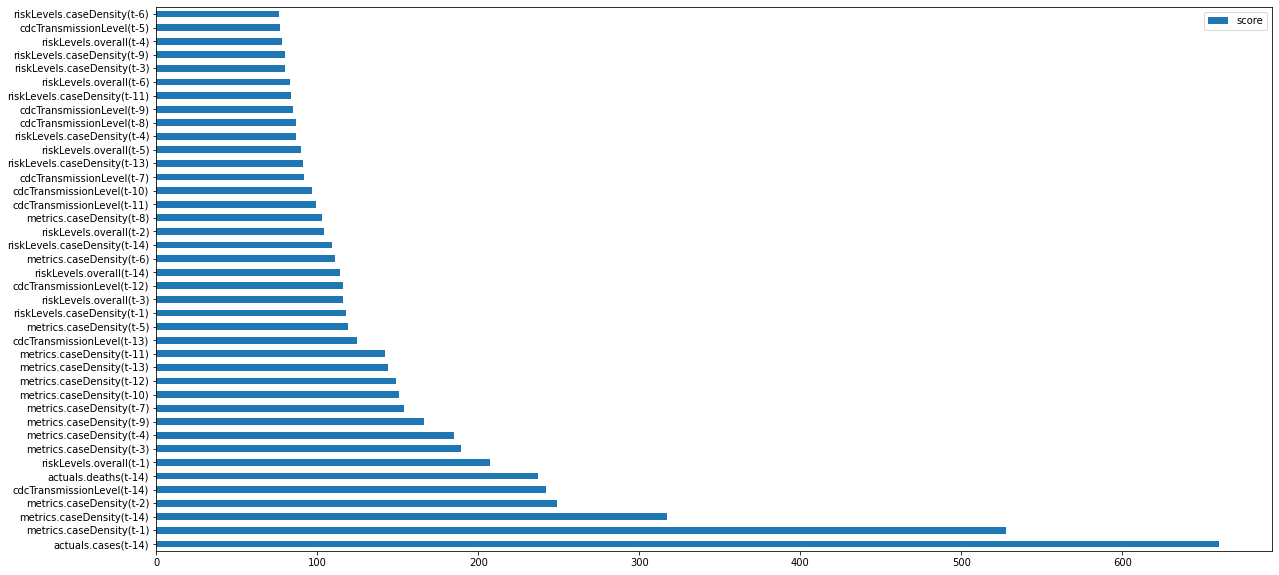

In [19]:
# Change estimators[?] to 0 for deaths and 1 for cases
feature_important = xg_reg.estimators_[1].get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

%matplotlib inline
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [20]:
X_train.columns.tolist()[43]

'riskLevels.caseDensity(t-10)'

In [21]:
newindices = []
for index in data.index:
    index = int((index.lstrip('f'))
    newindex = X_train.columns.tolist()[index]
    newindices.append(newindex)
    
data.index = newindices

SyntaxError: invalid syntax (<ipython-input-21-d654423a136e>, line 4)

In [ ]:
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features
plt.title('Covid Death Density Feature Importance')

In [ ]:
# concatenate all x and all y separately for feature importance

In [ ]:
pip install hyperopt

In [490]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [491]:
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK
import lightgbm as lgb

def objective_function(params):
    clf = lgb.LGBMClassifier(**params)
    score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    return {'loss': -score, 'status': STATUS_OK}

In [492]:
from hyperopt import hp
import numpy as np

space= {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': hp.quniform('max_depth', 5, 15, 1),
    'n_estimators': hp.quniform('n_estimators', 5, 35, 1),
    'num_leaves': hp.quniform('num_leaves', 5, 50, 1),
    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
}

In [493]:
from hyperopt import tpe

tpe_algorithm = tpe.suggest

In [494]:
from hyperopt import Trials

trials = Trials()

In [495]:
import csv

# File to save first results
out_file = 'gbm_trials.csv'
of_connection = open(out_file, 'w')
writer = csv.writer(of_connection)

# Write the headers to the file
writer.writerow(['loss', 'params', 'iteration', 'estimators', 'train_time'])
of_connection.close()

In [496]:
from hyperopt import fmin, tpe, Trials

import numpy as np

num_eval = 500

trials = Trials()

best_param = fmin(objective_function, space, algo=tpe.suggest, max_evals=num_eval, trials=trials, rstate= np.random.RandomState(1))

  0%|          | 0/500 [00:00<?, ?trial/s, best loss=?]


AttributeError: 'numpy.random.mtrand.RandomState' object has no attribute 'integers'

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


train_df = X_train #pd.read_csv('../input/train.csv', dtype={'id': np.int32, 'target': np.int8})
Y = y_train #train_df['target'].values
X = X_train #train_df.drop(['target', 'id'], axis=1)
test_df = y_test #pd.read_csv('../input/test.csv', dtype={'id': np.int32})
test = y_test #test_df.drop(['id'], axis=1)

In [ ]:
params = {}

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from datetime import datetime

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,Y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, Y)
timer(start_time) # timing ends here for "start_time" variable

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)

In [497]:
y_test = random_search.predict_proba(test)
results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})
results_df.to_csv('submission-random-grid-search-xgb-porto-01.csv', index=False)

NameError: name 'random_search' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
'objective':['reg:linear'],
'learning_rate': [.03, 0.05, .07], #so called `eta` value
'max_depth': [5, 6, 7],
'min_child_weight': [4],
'silent': [1],
'subsample': [0.7],
'colsample_bytree':[0.7],
'n_estimators': [500]}
xgb_grid = GridSearchCV(xg_reg,parameters,cv = 10, n_jobs = 2, verbose=1) #cv= Number of folds (Default to 10)



xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [498]:
from xgboost import plot_importance, plot_tree

plot_importance(xg_reg._Booster, height=0.9)

AttributeError: 'MultiOutputRegressor' object has no attribute '_Booster'

ERROR! Session/line number was not unique in database. History logging moved to new session 64


In [ ]:
#WORKING GRID SEARCH
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
parameters = {'estimator__nthread':[4], #when use hyperthread, xgboost may become slower
              'estimator__objective':['reg:linear'],
              'estimator__learning_rate': [0.03, 0.05, 0.07, 0.2, 0.3], #so called `eta` value
              'estimator__max_depth': [4, 5, 6, 7, 8],
              'estimator__min_child_weight': [1, 2, 3, 4, 5, 6, 7],
              'estimator__silent': [1],
              'estimator__subsample': [0.7, 1],
              'estimator__colsample_bytree':[0.7, 1],
              'estimator__n_estimators': [500]}
model = xgb.XGBRegressor()
multilabel_model = MultiOutputRegressor(model)

xgb_grid = GridSearchCV(multilabel_model,
                        parameters,
                        cv = 10, #cv= Number of folds (Default to 10)
                        n_jobs = 5,
                        verbose=True)

# fit the model
xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

best_model = xgb_grid.best_estimator_